##### INFORMATION RETRIEVAL AND ANALYSIS
**Bachelor Degree in Data Science and Engineering** - Cristina Aguilera González, Chus Antoñanzas Acero, Alex Carrillo Alza

$$
\huge \textsf{Information Retrieval and Analysis}
$$
$$
\LARGE \textsf{Lab Session 1: Powerlaws}
$$

## 1. Power Laws

A power law is
$$ y=c·(x+b)^a $$
for three constants _a, b_ and _c_.

A powerlaw with exponent $-1$ is called **Zipf's law**. Sometimes powerlaws with negative exponent are also called *Zipfian laws*.

## 2. Distribution of family names

In [1]:
from matplotlib import pyplot as plt
from scipy import optimize
import numpy as np
import csv

- Read `apellidos.csv` file

In [2]:
'''Plots the freq of a percentatge of words in a CSV file with 3 columns: rank, word, freq.'''
def plot_freq(csv_file, pct, log=False):
    with open(csv_file, mode = 'r') as csvFile:
        reader = csv.reader(csvFile, delimiter=';')
        table = list(reader)[1:]
    rank = [int(item[0]) for item in table]
    freq = [int(item[2]) for item in table]    
    end = int(pct/100*len(rank))
    if log:
        plt.plot(np.log(rank[:end]), np.log(freq[:end]), 'g', label='empirical log freq')
        lg = "Log f"
    else:
        plt.plot(rank[:end], freq[:end], label='empirical freq')
        lg = "F"
    plt.title(lg + "requence of " + str(pct) + "% of words in " + csv_file)
    plt.legend(); plt.show()
    return rank, freq

**Exercise 1.**
Plot the frequence of `apellidos` in decreasing order.

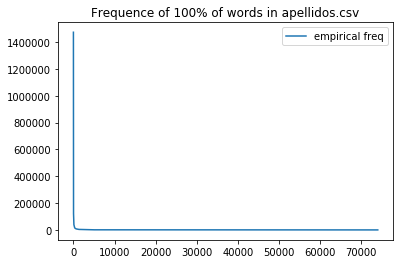

In [3]:
rank, freq = plot_freq("apellidos.csv", 100)

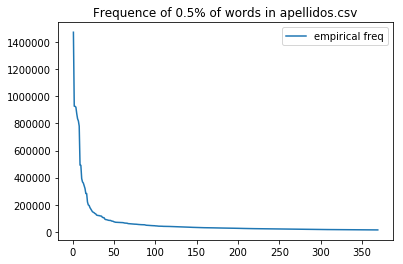

In [4]:
rank, freq = plot_freq("apellidos.csv", 0.5)

**Exercise 2.** Resist to say that this is an exponential distribution "because it deacreases very fast".
Given the powerlaw
$$ y=c·x^a $$
taking logs on both sides, it becomes
$$ log(y) = a·log(x) + log(c)$$
so $log(y)$ is a linear function of $log(x)$.

**Exercise 3.** Use logarithmic $x$ and $y$ axes.

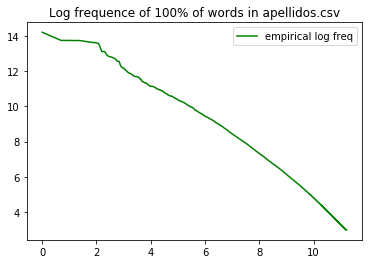

In [5]:
rank, freq = plot_freq("apellidos.csv", 100, log=True)

- It should be a straight line, with slope $a$ and intercept $log(c)$.
But the parameter $b$ distorts the low values, so in order to estimate $a$ and $c$ we have to pay attention to the large values.

**Exercise 4.** Find $a$ and $c$ analytically taking two distinct large values of $x$, having $log(y) = a·log(x) + log(c)$.

In [6]:
'''Finds "a" and "c" analytically using two (n1, n2) distinct large values of x.'''
def find_a_c(rank, freq, n1, n2):
    A = np.matrix([[np.log(rank[n1]),1],[np.log(rank[n2]),1]])
    v = np.matrix([[np.log(freq[n1])],[np.log(freq[n2])]])
    x = (A**-1)*v    # x[0,0] corresponds to 'a'
                     # x[1,0] corresponds to 'log(c)'
    a = x[0,0]
    c = np.exp(x[1,0])
    return a, c

In [7]:
a, c = find_a_c(rank, freq, 50000, 70000)

- We create the line equation with the obtained parameters $a$ and $c$.

In [8]:
'''Plots the LINE or POWERLAW fitting given the parameters: a, b, c.'''
def plot_fitted(rank, freq, a, b, c, pwlaw=False):
    if pwlaw:
        x = np.linspace(1, max(rank), 100000)
        y_axis = np.log(c*(x + b)**a); x_axis = np.log(x); mode = "powerlaw"
    else:
        x_axis = np.linspace(1, max(np.log(rank)), 100)
        y_axis = a*x_axis + np.log(c); mode = "line"
    plt.plot(np.log(rank), np.log(freq), 'g', label='empirical log freq')
    plt.plot(x_axis, y_axis, 'r', label='fitted log freq'); plt.legend()
    plt.title("Fitting of empirical freq with a " + mode)

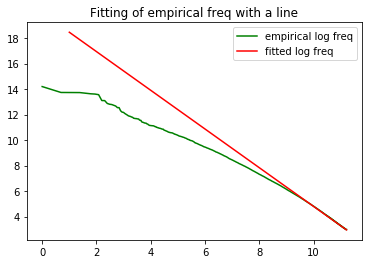

In [9]:
plot_fitted(rank, freq, a, 0, c)

In [10]:
'''Finds the parameter "b" knowing the parameters (a,c) and minimazing the MSE.'''
def find_b(rank, freq, a, c):
    # Variables used in the computation of the MSE.
    n = len(freq)
    rankArr = np.array(rank)
    freqArr = np.array(freq)
    '''Returns the evaluation of the MSE, given "b"'''
    def mse(b):
        y = c*((rankArr+b)**a)
        e = y - freqArr
        return np.dot(e,e) / n
    minimum = optimize.fmin(mse, x0=1)
    b = minimum[0]
    return b

In [11]:
b = find_b(rank, freq, a, c)

Optimization terminated successfully.
         Current function value: 72018095.796322
         Iterations: 30
         Function evaluations: 60


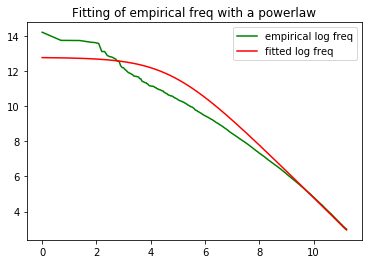

In [12]:
plot_fitted(rank, freq, a, b, c, pwlaw=True)

## 3. Distribution of river lengths

**Exercise 6.** Check if the it follows something like a powerlaw.

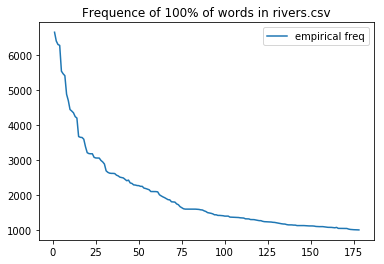

In [30]:
rank_river, freq_river = plot_freq("rivers.csv", 100)

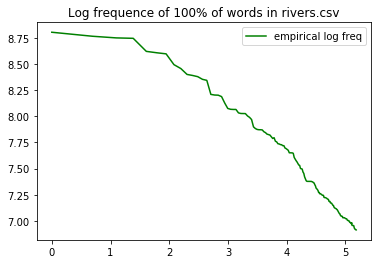

In [31]:
rank_river, freq_river = plot_freq("rivers.csv", 100, log=True)

In [32]:
a_river, c_river = find_a_c(rank_river, freq_river, 150, 160)

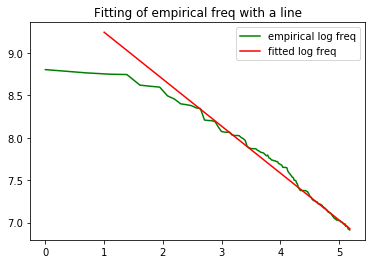

In [36]:
plot_fitted(rank_river, freq_river, a_river, 0, c_river)

In [34]:
b_river = find_b(rank_river, freq_river, a_river, c_river)

Optimization terminated successfully.
         Current function value: 36972.306960
         Iterations: 20
         Function evaluations: 40


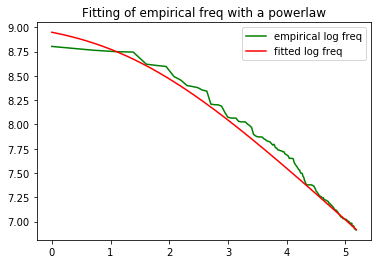

In [35]:
plot_fitted(rank_river, freq_river, a_river, b_river, c_river, pwlaw=True)

In [37]:
print(a_river, b_river, c_river)

-0.5532109039441053 3.6267578125000055 17958.245040306134


## 4. Words in text

**Exercise 7.** Write Python code that
- processes all text files in a directory
- reads it line by line
- it removes punctuation signs (.,;:-?!) and transforms it to lowercase
- writes the dictionary as a `.csv` with three columns: rank, word and frequences

In [14]:
from os import listdir
from os.path import isfile, join, isdir
import unicodedata

In [15]:
def clean_word(word):
    try:
        for i, c in enumerate(word):                           # Exactly the same from the implementation
            if not unicodedata.name(c).startswith("LATIN"):    # of Jordi Petit in µoogle.
                return word[:i].lower()
    except:
        print("A word could not be recognised.")
    return word.lower()

In [16]:
'''Creates a CSV output with frequencies of words from files in directory.'''
def readWords(path, output_filename):
    dicc = {}
    for file in listdir(path):                            # Visit each file of the directory.
        if not file.startswith('.'):                      # (avoiding hidden files!)
            print("Processing: ", file)
            text = open(join(path,file), 'r').read()      # Open one of the texts of the directory.
            for word in map(clean_word, text.split()):    # The text is splitted in words and 
                if word not in dicc:                      # each one is cleaned individually.
                    dicc[word] = 0
                dicc[word] += 1                           # Count the occurences in a dictionary.
            print("Done.", '\n')
                                                          # (we need to delete the empty '' ocurrence)
    del dicc['']
    with open(output_filename, 'w') as csvFile:                                   # Create a CSV file.
        csv.writer(csvFile, delimiter=';').writerow(["rank","word","freq"])
        for i, word in enumerate(sorted(dicc, key=dicc.get, reverse=True), 1):    # Enumerating and sorting the dict.
            csv.writer(csvFile, delimiter=';').writerow([i,word,dicc[word]])

In [17]:
readWords("novels","dictionary.csv")

Processing:  pg20826.txt
Done. 

Processing:  pg22566.txt
Done. 

Processing:  DickensGreatExpectations.txt
Done. 

Processing:  pg4064.txt
Done. 

Processing:  pg17326.txt
Done. 

Processing:  27531-0.txt
Done. 

Processing:  pg38498.txt
Done. 

Processing:  pg14458.txt
Done. 

Processing:  pg30896.txt
Done. 

Processing:  KiplingJungleBook.txt
Done. 

Processing:  pg4358.txt
Done. 

Processing:  pg31796.txt
Done. 

Processing:  pg4228.txt
Done. 

Processing:  PoeWorksVol2.txt
Done. 

Processing:  pg4361.txt
Done. 

Processing:  PoeWorksVol1.txt
A word could not be recognised.
A word could not be recognised.
A word could not be recognised.
A word could not be recognised.
A word could not be recognised.
A word could not be recognised.
A word could not be recognised.
Done. 

Processing:  pg31151.txt
Done. 

Processing:  pg1410.txt
Done. 

Processing:  pg22082.txt
Done. 

Processing:  pg2482.txt
Done. 

Processing:  pg20939.txt
Done. 

Processing:  pg13314.txt
Done. 

Processing:  RiceBu

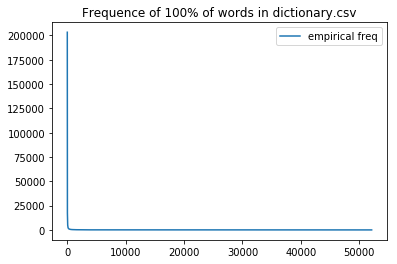

In [18]:
rank_dicc, freq_dicc = plot_freq("dictionary.csv", 100)

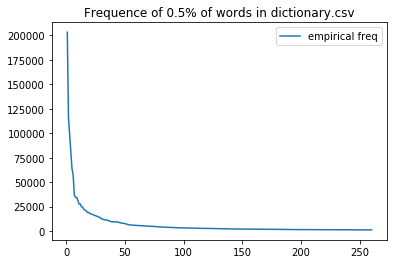

In [19]:
rank_dicc, freq_dicc = plot_freq("dictionary.csv", 0.5)

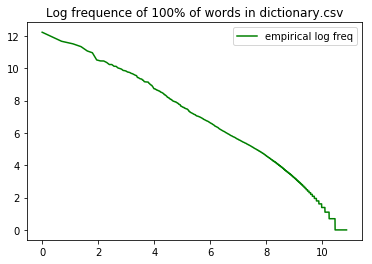

In [41]:
rank_dicc, freq_dicc = plot_freq("dictionary.csv", 100, log=True)

In [42]:
a_dicc, c_dicc = find_a_c(rank_dicc, freq_dicc, 200, 250)

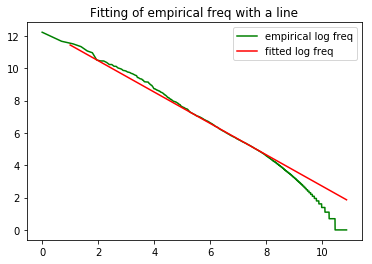

In [43]:
plot_fitted(rank_dicc, freq_dicc, a_dicc, 0, c_dicc)

In [40]:
b_dicc = find_b(rank_dicc, freq_dicc, a_dicc, c_dicc)

Optimization terminated successfully.
         Current function value: 41735.940533
         Iterations: 18
         Function evaluations: 36


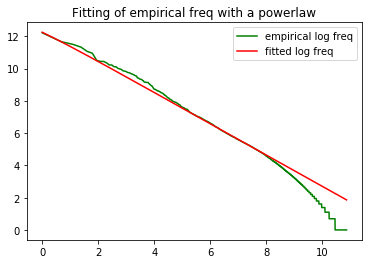

In [24]:
plot_fitted(rank_dicc, freq_dicc, a_dicc, b_dicc, c_dicc, pwlaw=True)

**Exercise 9.** Now do the following test. Change your program so that for some k, it prints the number of different words in the collection after it has read k, 2k, 3k, 4k, etc. words from the collection. Collect the output of pairs {(ik, distinct words after reading ik words)}. Create a plot and check whether the distribution looks like a powerlaw.

In [25]:
'''Creates a CSV output 'output_filename' with number of distinct words from files in 'path'
for every 'k' words read.'''
def countDistWords(path, output_filename, k):
    dicc = {}
    distinct_w = total_words = 0
    splits = np.array([])
    for file in listdir(path):                            # Visit each file of the directory.
        if not file.startswith('.'):                      # (avoiding hidden files!)
            print("Processing: ", file)
            text = open(join(path,file), 'r').read()      # Open one of the texts of the directory.
            for word in map(clean_word, text.split()):    # The text is splitted in words and 
                total_words += 1
                if word not in dicc:                      # each one is cleaned individually.
                    dicc[word] = 0
                    distinct_w += 1 
                if total_words % k == 0:
                    splits = np.append(splits, int(distinct_w))
                    print(distinct_w, "distinct words from", total_words, "processed.")
            print("\n")
    splits = np.append(splits, int(distinct_w))                # Append total distinct words.
    print("Done. A total of", distinct_w, "distinct words from", total_words, "processed.", '\n')
    del dicc['']                                          # (we need to delete the empty '' ocurrence)
    with open(output_filename, 'w') as csvFile:                                   # Create a CSV file.
        csv.writer(csvFile, delimiter=';').writerow(["Words Read", "Distinct Words"])
        for i, n_words in enumerate(splits, 1):           # Enumerating the array.
            if i != len(splits):
                csv.writer(csvFile, delimiter=';').writerow([i*k, n_words])
            else:
                csv.writer(csvFile, delimiter=';').writerow([total_words, n_words])

In [26]:
'''Same as before, but for a CSV with columns "Words Read" and "Distinct words".'''
def plot_dist_w(csv_file, pct, log=False):
    with open(csv_file, mode = 'r') as csvFile:
        reader = csv.reader(csvFile, delimiter=';')
        table = list(reader)[1:]
    rank = [int(item[0]) for item in table]
    dist_w = [float(item[1]) for item in table]    
    end = int(pct/100*len(rank))
    if log:
        plt.plot(np.log(rank[:end]), np.log(dist_w[:end]), 'g');
        ln = "Log n"
    else:
        plt.plot(rank[:end], dist_w[:end]);
        ln = 'N'
    plt.title(ln + "umber of distinct words from " + str(pct) + "% of " + csv_file)
    plt.show()
    return rank, dist_w

In [27]:
countDistWords("novels", "distinct.csv", 50000)

Processing:  pg20826.txt
5685 distinct words from 50000 processed.


Processing:  pg22566.txt
8367 distinct words from 100000 processed.


Processing:  DickensGreatExpectations.txt
10345 distinct words from 150000 processed.
12084 distinct words from 200000 processed.
13436 distinct words from 250000 processed.
14434 distinct words from 300000 processed.


Processing:  pg4064.txt
16077 distinct words from 350000 processed.


Processing:  pg17326.txt
18679 distinct words from 400000 processed.
20273 distinct words from 450000 processed.


Processing:  27531-0.txt
21539 distinct words from 500000 processed.


Processing:  pg38498.txt
23018 distinct words from 550000 processed.
24380 distinct words from 600000 processed.


Processing:  pg14458.txt
25476 distinct words from 650000 processed.


Processing:  pg30896.txt
26230 distinct words from 700000 processed.
27356 distinct words from 750000 processed.
28261 distinct words from 800000 processed.
29050 distinct words from 850000 processed

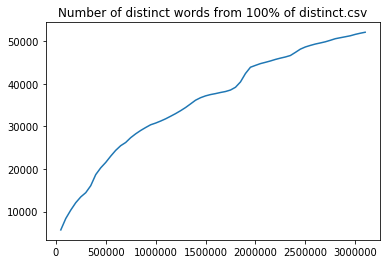

In [28]:
rank_dist, dist_w = plot_dist_w("distinct.csv", 100)

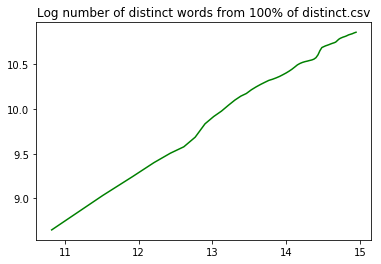

In [29]:
rank_dist, dist_w = plot_dist_w("distinct.csv", 100, log=True)